## **Hypothesis Testing**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


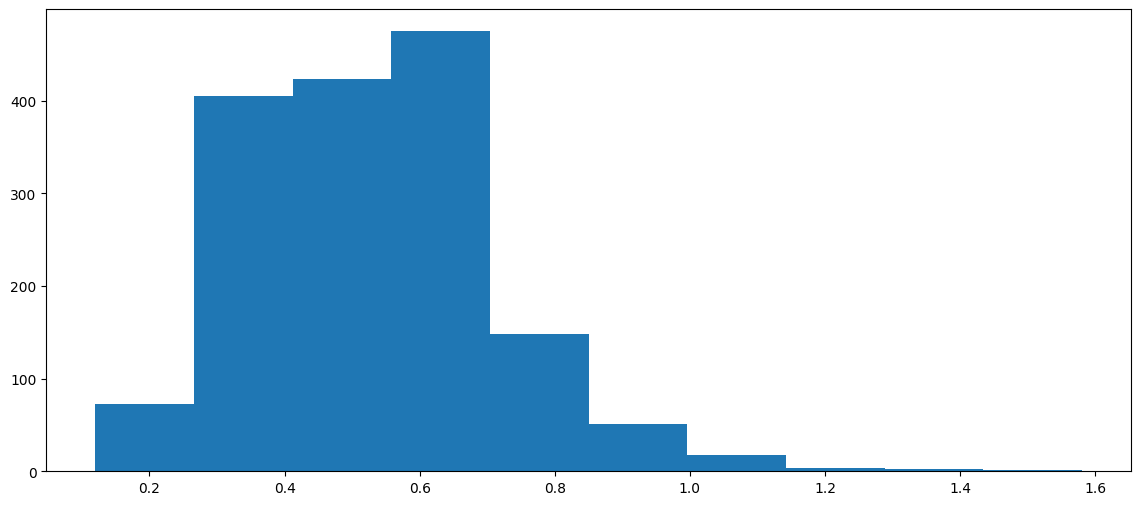

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.hist(df['volatile acidity'])
plt.show()

### Test Normality using shapiro-wilk test

In [ ]:
from scipy.stats import shapiro

Data_to_test  = df['volatile acidity']
stat, p = shapiro(Data_to_test)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
  print('Normal Distribution')
else:
  print('Not a Normal Distribution')

stat=0.97, p=0.000000000000000268638537394731
Not a Normal Distribution


In [ ]:
## Lets try with random numbers

from numpy.random import randn
data_to_test = randn(100)

In [ ]:
data_to_test

array([-0.42733425,  1.62072542, -0.24313455,  0.20508041,  0.48537034,
       -0.73630495, -1.24742028,  1.68223911,  0.66944015,  2.03282277,
       -0.18045996,  0.40380083,  0.51168223,  0.025562  ,  0.24540489,
       -2.35559494,  0.19893262,  1.5659374 ,  1.02105875, -0.28085541,
       -0.33289295,  0.37391673, -0.73303337, -0.63358281,  0.62022806,
       -1.21475601, -1.19705431, -0.74880122, -0.30078774,  0.32790119,
        0.42770025, -0.69810272, -2.32500323,  0.11302833, -1.88557403,
        0.84643966, -0.64051756, -0.68905236,  0.26077455,  1.53897588,
        1.40875558, -0.22348221, -0.7203166 , -0.04383376,  0.3217862 ,
       -0.913344  ,  0.51469163, -0.88272598,  1.16924796,  0.50415631,
       -0.36309343,  0.73872483,  1.3867743 , -0.45073957, -1.15972504,
       -3.1007199 , -0.13542834,  0.30490045,  1.17623152, -2.05058007,
       -1.01736755,  0.13645126, -0.80488725, -1.56742257,  1.13448617,
       -0.18471947, -1.00358227, -1.75732228, -0.35794527, -0.59

In [ ]:
stat, p = shapiro(data_to_test)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
  print('Normal Distribution')
else:
  print('Not a Normal Distribution')

stat=0.99, p=0.966358065605163574218750000000
Normal Distribution


## **K^2 Noramlity Test**: Tests if data is normally distributed
Assumption: Observations are identically distributed

In [ ]:
# D'Agostino-Pearsons K^2 test

from scipy.stats import normaltest

data_to_test = df['volatile acidity']

stat, p = normaltest(data_to_test)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
  print('Normal Distribution')
else:
  print('Not a Normal Distribution')

stat=143.42, p=0.000000000000000000000000000000
Not a Normal Distribution


### Correlation Test
#### Pearsons and Spearmans rank correlation
Assumption: Identical and Normal Distribution

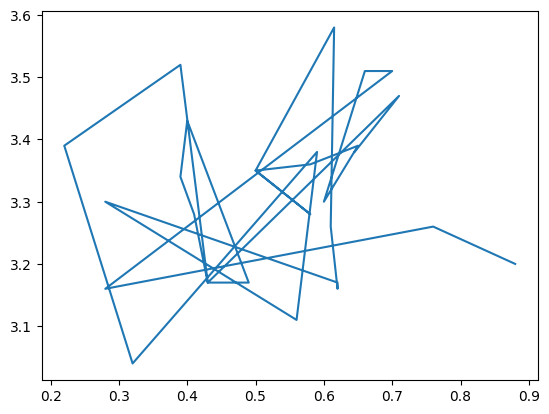

In [ ]:
first_sample = df[1:30]['volatile acidity']
second_sample = df[1:30]['pH']

plt.plot(first_sample, second_sample)
plt.show()

By visualizing the plot there is no proper correlation, lets check that spearman rank correlation, there is no relation i.e variables are not dependent on each other

In [ ]:
# Spearman Rank correlation
from scipy.stats import spearmanr
stat, p = spearmanr(first_sample, second_sample)

print('stat=%.3f, p=%.5f' % (stat, p))

if p>0.05:
  print('independent samples')
else:
  print('Dependent samples')

stat=0.199, p=0.30136
independent samples


In [ ]:
# Pearsons correlation
from scipy.stats import pearsonr
stat, p = pearsonr(first_sample, second_sample)

print('stat=%.3f, p=%.5f' % (stat, p))

if p>0.05:
  print('independent samples')
else:
  print('Dependent samples')


stat=0.176, p=0.36047
independent samples


In [ ]:
# Now lets try with corelated features

df[1:30].corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.325296,0.553331,0.064789,0.145997,0.369643,0.351803,0.558823,-0.554355,0.176146,-0.014915,0.232732
volatile acidity,-0.325296,1.000000,-0.808892,0.086848,-0.086997,-0.046489,-0.045020,-0.018832,0.176232,-0.058765,-0.116946,-0.323907
citric acid,0.553331,-0.808892,1.000000,0.163451,0.302150,0.273691,0.356156,0.321183,-0.402765,0.404090,0.247358,0.246825
residual sugar,0.064789,0.086848,0.163451,1.000000,-0.069497,0.278564,0.580704,0.524667,-0.011351,0.074962,0.358012,-0.324054
chlorides,0.145997,-0.086997,0.302150,-0.069497,1.000000,0.226563,0.211043,0.118830,-0.601472,0.644596,-0.342212,-0.037891
free sulfur dioxide,0.369643,-0.046489,0.273691,0.278564,0.226563,1.000000,0.854553,0.430067,-0.204240,0.156305,0.056671,0.120759
total sulfur dioxide,0.351803,-0.045020,0.356156,0.580704,0.211043,0.854553,1.000000,0.523186,-0.280118,0.210051,0.229037,-0.112902
density,0.558823,-0.018832,0.321183,0.524667,0.118830,0.430067,0.523186,1.000000,-0.181546,0.300643,-0.089917,-0.249689
pH,-0.554355,0.176232,-0.402765,-0.011351,-0.601472,-0.204240,-0.280118,-0.181546,1.000000,-0.539957,0.232744,0.007259
sulphates,0.176146,-0.058765,0.404090,0.074962,0.644596,0.156305,0.210051,0.300643,-0.539957,1.000000,-0.172364,-0.120335


WE can notice that from above table, free sulfur dioxide and total sulfur dioxide having 0.85 correlation coefficient. Lets try with these variables.

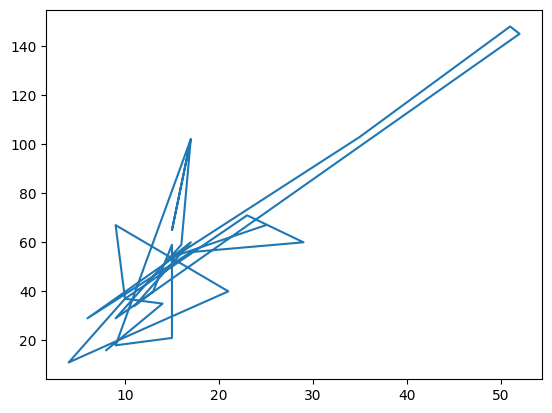

In [ ]:
first_sample = df[1:30]['free sulfur dioxide']
second_sample = df[1:30]['total sulfur dioxide']

plt.plot(first_sample, second_sample)
plt.show()

We can see by plot there is correlation

In [ ]:
# Spearman Rank correlation
from scipy.stats import spearmanr
stat, p = spearmanr(first_sample, second_sample)

print('stat=%.3f, p=%.5f' % (stat, p))

if p>0.05:
  print('independent samples')
else:
  print('Dependent samples')

stat=0.805, p=0.00000
Dependent samples


In [ ]:
# Pearsons correlation
from scipy.stats import pearsonr
stat, p = pearsonr(first_sample, second_sample)

print('stat=%.3f, p=%.5f' % (stat, p))

if p>0.05:
  print('independent samples')
else:
  print('Dependent samples')


stat=0.855, p=0.00000
Dependent samples


This is correlation for two continous variables.

### **Correlation of two categorical variables: Chi square test**

1. Tests whether two categorical variables are related or independent
2. Assumptions: independent observation, size in each box of contigency table > 25

In [ ]:
df = pd.read_csv('loan_prediction.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
contigency_table = pd.crosstab(df['Education'], df['Loan_Status'], margins=False)
contigency_table


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contigency_table)

print('stat=%.3f, p=%.3f' % (stat, p))
if p>0.05:
  print('independent categories')
else:
  print('dependent categories')

stat=4.091, p=0.043
dependent categories


In [ ]:
contigency_data = [[25,125],[1200, 240]]

In [ ]:
stat, p, dof, expected = chi2_contingency(contigency_data)

print('stat=%.3f, p=%.3f' % (stat, p))
if p>0.05:
  print('independent categories')
else:
  print('dependent categories')

stat=337.622, p=0.000
dependent categories


## **Parametric Test**
Assumption: Data is normally distributed
#### T-test

In [ ]:
# scores of me and virat

my_score = [23,21,31,20,19,35,26,22,21,19]
virat_score = [46,42,62,40,38,70,52,44,42,38]

In [ ]:
# Lets check mean of our scores

import numpy as np
print('Ganga mean score:',np.mean(my_score))
print('Virat mean score:',np.mean(virat_score))

Ganga mean score: 23.7
Virat mean score: 47.4


In [ ]:
# one sample T-test

import scipy
scipy.stats.ttest_1samp(my_score,15)

TtestResult(statistic=5.098084116200569, pvalue=0.0006468242923305229, df=9)

Here i set 15 as my mean score, pvalue not significant
lets try with 20



In [ ]:
scipy.stats.ttest_1samp(my_score,20)

TtestResult(statistic=2.1681507160852993, pvalue=0.058288767709368715, df=9)

Now p value is greater than 0.05, my mean value is near to test static.

In [ ]:
scipy.stats.ttest_1samp(my_score,23.7)

TtestResult(statistic=0.0, pvalue=1.0, df=9)

In [ ]:
# Independent sample T-test

scipy.stats.ttest_ind(my_score,virat_score)

Ttest_indResult(statistic=-6.210850679090182, pvalue=7.3390410384768156e-06)

Here my null hypothesis is means of two samples is equal, but i got very less p value hence null hypothesis rejected.

In [ ]:
# Paired sample T-test

my_score_second_tour = [46,42,62,40,38,70,52,44,42,38]

In [ ]:
scipy.stats.ttest_rel(my_score,my_score_second_tour)

TtestResult(statistic=-13.88788431654638, pvalue=2.1983272300073563e-07, df=9)

Now both the scores are from me only on different intervals, thats why we are using paired sample T-test
Here also i got less p value, my mean values are different.

## **Anova** 


1.   Tests whether the means of two or more independent samples are significantly different
2.   **Assumption**: Normal Distribution, same variance, identical distribution







In [ ]:
average_score = [40,44,60,50,48,68,55,46,44,54]

In [ ]:
tstat,p = scipy.stats.f_oneway(my_score, average_score, virat_score)
print('tstat=%.3f, p=%.3f' % (tstat, p))
if p>0.05:
  print('same distribution of scores')
else:
  print('Different distributions of score')

tstat=30.173, p=0.000
Different distributions of score


In [ ]:
stat,p = scipy.stats.f_oneway(my_score, average_score, virat_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p>0.05:
  print('same distribution of scores')
else:
  print('Different distributions of score')

stat=30.173, p=0.000
Different distributions of score


## **Non_parametric test**: Mann Whitney U-Test


1.   Tests whether the distributions of two or more independent samples are equal or not
2.   Assumption: Identical distribution, observation can be ranked
3.   Non-parametric means it not assume data is normally distributed



In [2]:
class_1_score = [91,90,81,80,76]
class_2_score = [88,86,85,84,83]

In [5]:
import scipy
stat, p = scipy.stats.mannwhitneyu(class_1_score, class_2_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p>0.05:
  print('Same Distribution')
else:
  print('Different Distribution')

stat=10.000, p=0.690
Same Distribution


## Test of Stationarity (For Time Series analysis)
1. Augmented Dicky-fuller test: Null Hypothesis-Series is not stationary
2. Def of stationary time series: constant mean and variance over a period of time

In [6]:
from statsmodels.tsa.stattools import adfuller
stock_price_data = [121,131,142,138,139,142,156,168,165]
stat, p, lags, obs, crit, t = adfuller(stock_price_data)

print('stat=%.3f, p=%.3f' % (stat, p))
if p>0.05:
  print('Series is not stationary')
else:
  print('Series is stationary')

stat=-0.949, p=0.772
Series is not stationary


In [7]:
stock_price_data = [121,131,142,121,131,142,121,131,142]
stat, p, lags, obs, crit, t = adfuller(stock_price_data)

print('stat=%.3f, p=%.3f' % (stat, p))
if p>0.05:
  print('Series is not stationary')
else:
  print('Series is stationary')

stat=-3118828938962.603, p=0.000
Series is stationary


## END